# Diabetes Prediction

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables 
includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
%matplotlib inline
sns.set()

In [39]:
diab = pd.read_csv('C:\\Users\\GA336773\\Desktop\\Python Data Science\\Datasets\\Diabetes Data.csv')

In [40]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
diab.shape

(768, 9)

In [42]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
diab['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [45]:
diab['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [46]:
diab['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


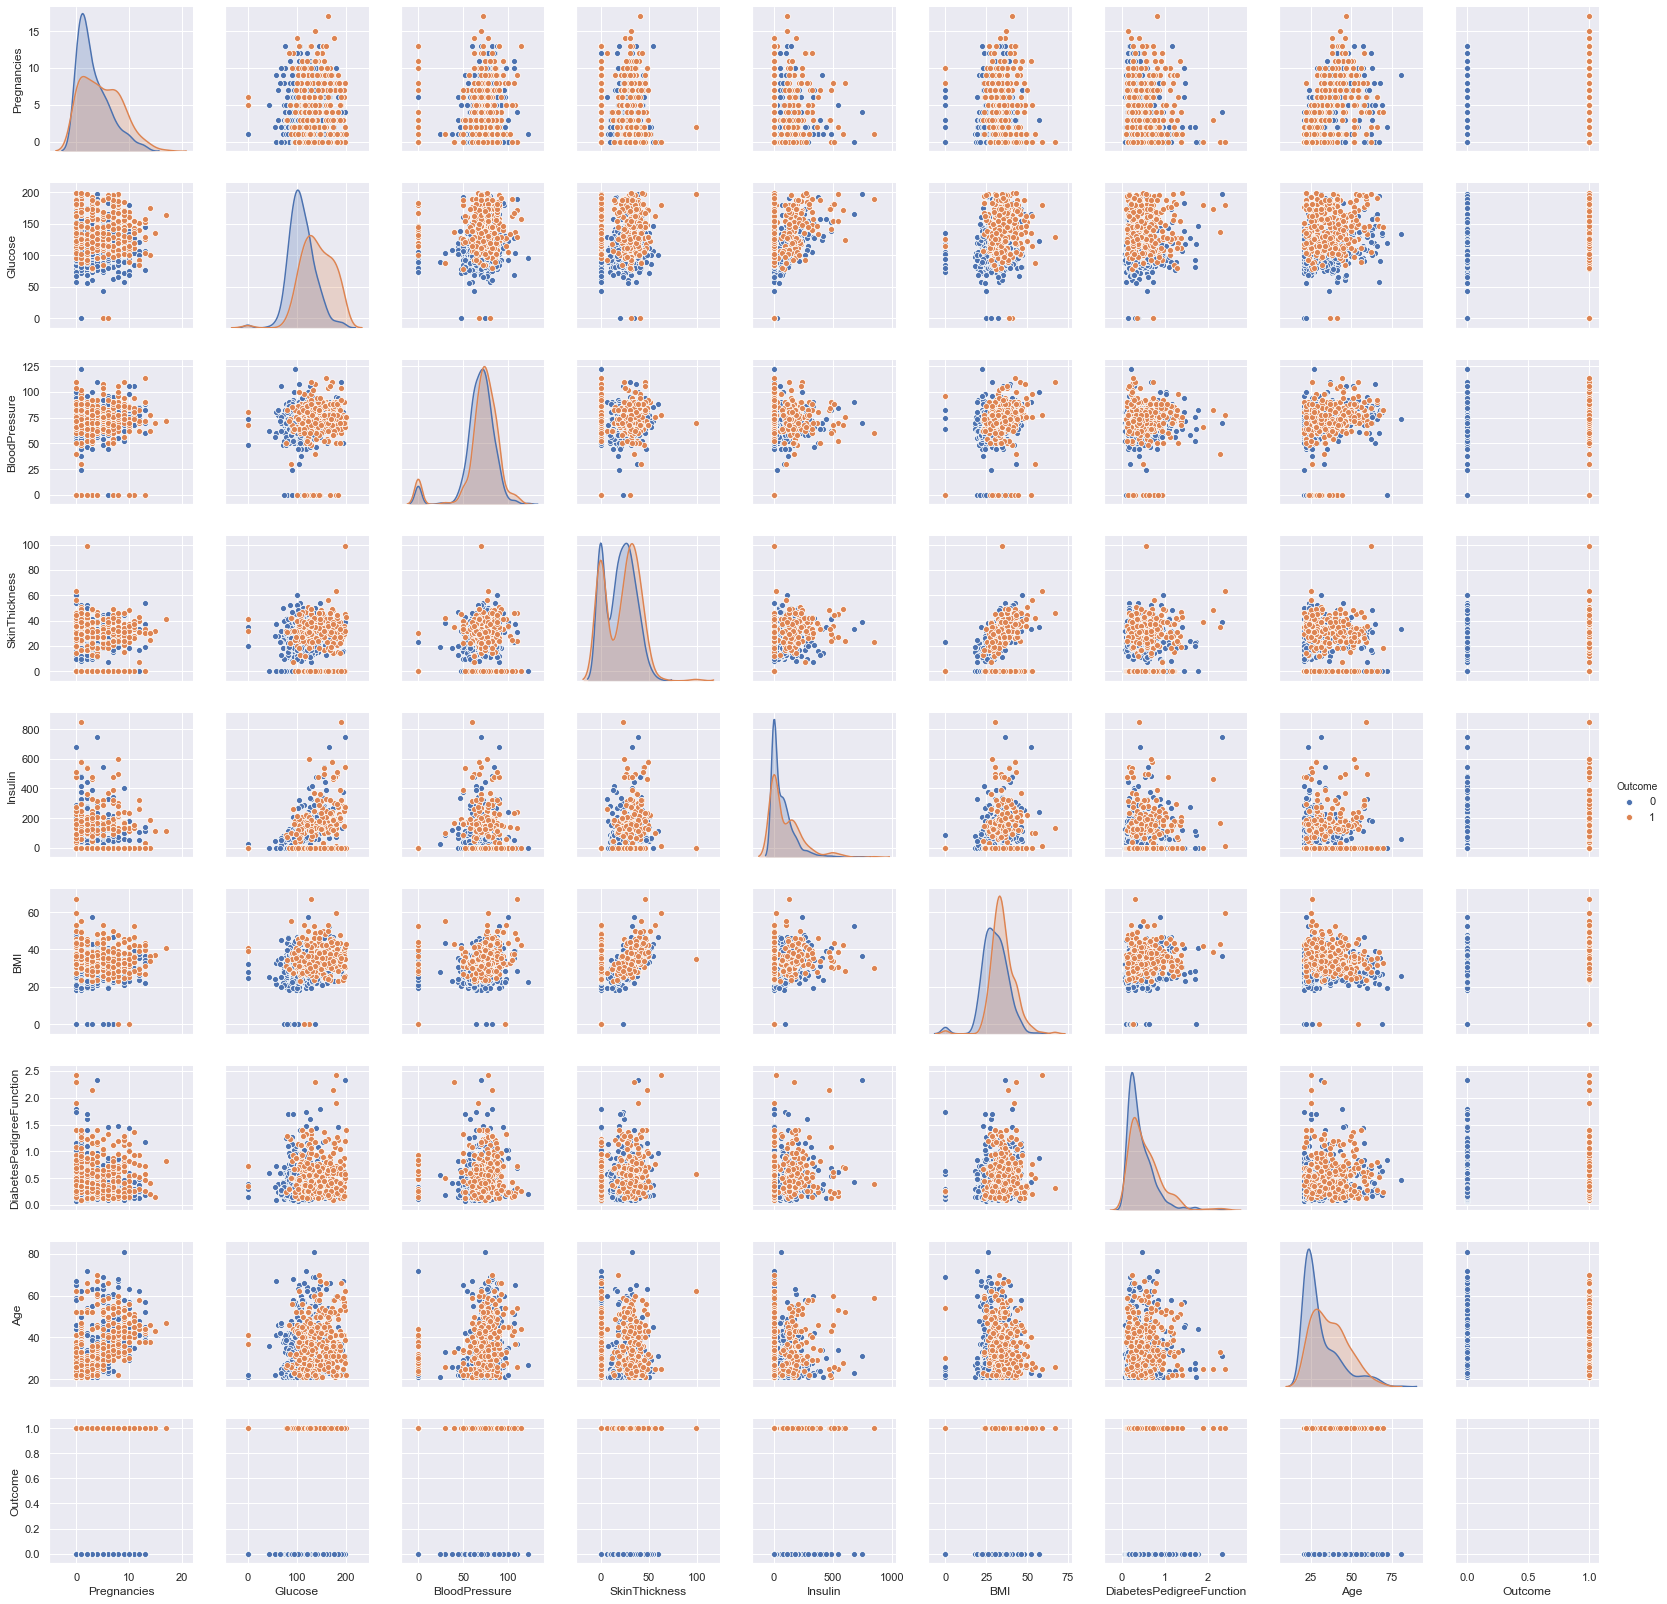

In [47]:
sns.pairplot(diab, hue = 'Outcome')

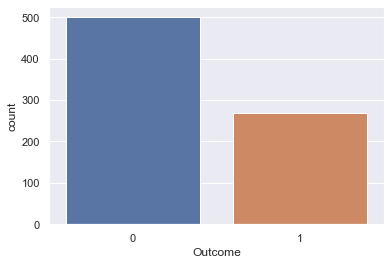

In [48]:
sns.countplot(x = 'Outcome', data = diab)

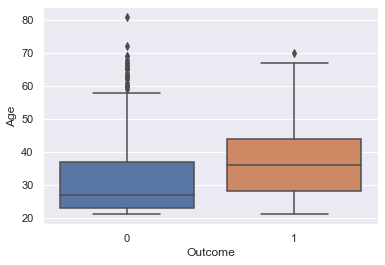

In [49]:
sns.boxplot(x = 'Outcome', y = 'Age', data = diab)

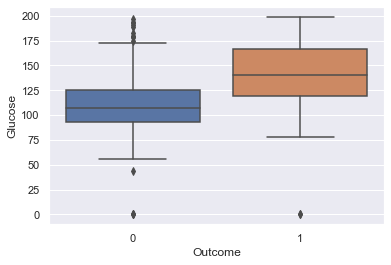

In [50]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = diab)

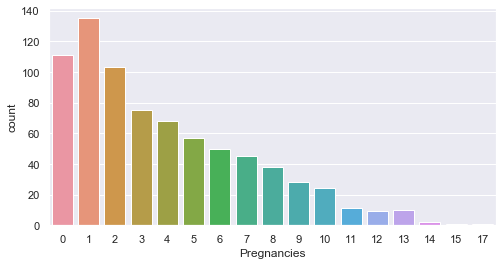

In [51]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Pregnancies', data = diab)

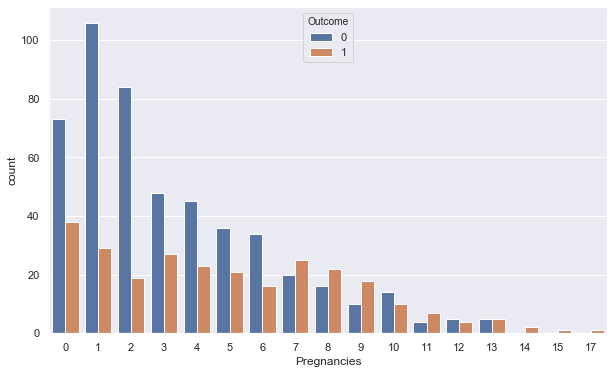

In [52]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Pregnancies', data = diab, hue = 'Outcome')

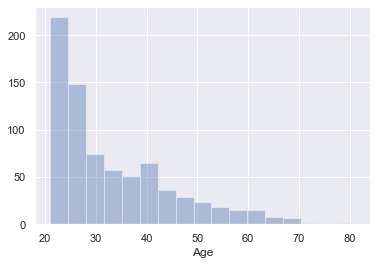

In [53]:
sns.distplot(diab['Age'], kde = False)

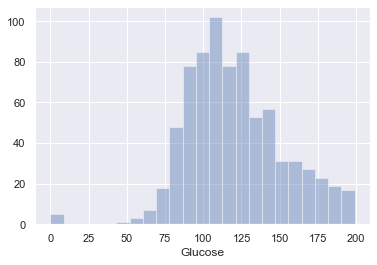

In [54]:
sns.distplot(diab['Glucose'], kde = False)

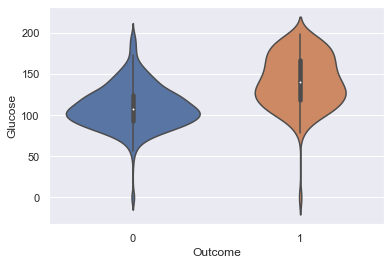

In [55]:
sns.violinplot(x = 'Outcome', y = 'Glucose', data = diab)

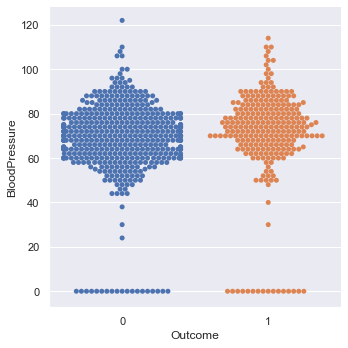

In [56]:
sns.catplot(x = 'Outcome', y = 'BloodPressure', kind = 'swarm', data = diab)

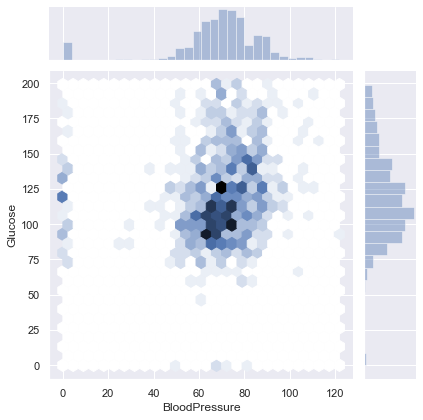

In [57]:
sns.jointplot(x = 'BloodPressure', y = 'Glucose', data = diab, kind = 'hexbin')

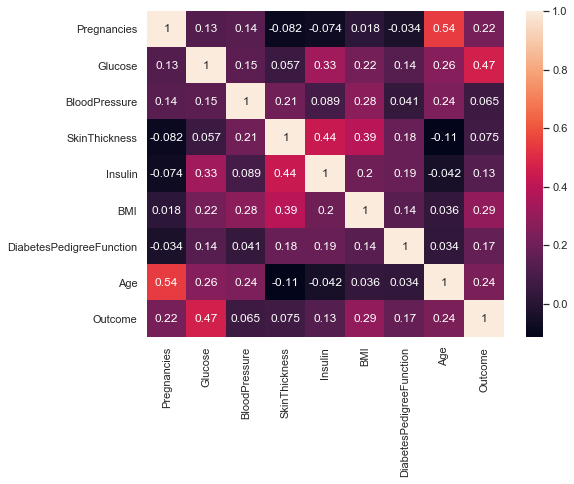

In [58]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(diab.corr(), annot = True)
bottom, top = ax.get_ylim()
bottom, top = ax.set_ylim(bottom + 0.5, top - 0.5)

# Creting the model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
X = diab.drop('Outcome',axis=1).values
Y = diab['Outcome'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
X_train.shape

(614, 8)

In [62]:
log = LogisticRegression()

log.fit(X_train, Y_train)
predicted = log.predict(X_test)

result = log.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 79.870%
[[90 13]
 [18 33]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.72      0.65      0.68        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.80       154



In [63]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, Y_train)
predicted = lda.predict(X_test)

result = lda.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 79.221%
[[89 14]
 [18 33]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [64]:
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)

result = knn.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 74.026%
[[93 10]
 [30 21]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       103
           1       0.68      0.41      0.51        51

    accuracy                           0.74       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.74      0.72       154



In [65]:
param_grid = {'n_neighbors' : [i for i in range(1,29,2)]}
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid)
grid_KNN.fit(X_train, Y_train)

print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)

grid_KNN_predictions = grid_KNN.predict(X_test)
print(classification_report(Y_test, grid_KNN_predictions))
print(confusion_matrix(Y_test, grid_KNN_predictions))
result = grid_KNN.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

{'n_neighbors': 27}
KNeighborsClassifier(n_neighbors=27)
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       103
           1       0.70      0.51      0.59        51

    accuracy                           0.77       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154

[[92 11]
 [25 26]]
Accuracy: 76.623%


In [66]:
rfc = RandomForestClassifier(n_estimators = 200)

rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

result = rfc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

Accuracy: 78.571%
[[90 13]
 [20 31]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       103
           1       0.70      0.61      0.65        51

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [67]:
svc = SVC()

svc.fit(X_train, Y_train)
predicted = svc.predict(X_test)

result = svc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 79.870%
[[92 11]
 [20 31]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       103
           1       0.74      0.61      0.67        51

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



In [68]:
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma' : [1,0.1,0.01,0.001,0.0001]}
grid_SVM = GridSearchCV(SVC(), param_grid)
grid_SVM.fit(X_train, Y_train)

print(grid_SVM.best_params_)
print(grid_SVM.best_estimator_)
grid_SVM_predictions = grid_SVM.predict(X_test)

print(classification_report(Y_test, grid_SVM_predictions))
print(confusion_matrix(Y_test, grid_SVM_predictions))
result = grid_SVM.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

{'C': 100, 'gamma': 0.001}
SVC(C=100, gamma=0.001)
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.73      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

[[92 11]
 [21 30]]
Accuracy: 79.221%


In [69]:
etc = ExtraTreesClassifier()

etc.fit(X_train, Y_train)
predicted = etc.predict(X_test)

result = etc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 79.870%
[[91 12]
 [19 32]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       103
           1       0.73      0.63      0.67        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.76       154
weighted avg       0.79      0.80      0.79       154



In [70]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, Y_train)
predicted = gbc.predict(X_test)

result = gbc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 76.623%
[[85 18]
 [18 33]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.65      0.65      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [71]:
adc = AdaBoostClassifier()

adc.fit(X_train, Y_train)
predicted = adc.predict(X_test)

result = adc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

Accuracy: 75.325%
[[88 15]
 [23 28]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       103
           1       0.65      0.55      0.60        51

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.75      0.75       154



# Deploying the model

In [72]:
import pickle
import joblib

In [73]:
joblib.dump(log, 'final_diab_model.h5')
joblib.dump(scaler,'diab_scaler.pkl')

['diab_scaler.pkl']

In [74]:
loaded_model = joblib.load('final_diab_model.h5')
loaded_scaler = joblib.load('diab_scaler.pkl')
result = loaded_model.score(X_test, Y_test)
print(result)

0.7987012987012987


In [81]:
def return_prediction(model,scaler,sample_json):
    
    Pregnancies = sample_json['Pregnancies']
    Glucose = sample_json['Glucose']
    BloodPressure = sample_json['BloodPressure']
    SkinThickness = sample_json['SkinThickness']
    Insulin = sample_json['Insulin']
    BMI = sample_json['BMI']
    DiabetesPedigreeFunction = sample_json['DiabetesPedigreeFunction']
    Age = sample_json['Age']
    
    diabetes = [[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]]
    
    diabetes = scaler.transform(diabetes)
    
    classes = np.array(['Not Diabetic!', 'Diabetic!'])
    
    class_ind = model.predict(diabetes)
    
    return classes[class_ind][0]

In [82]:
diab_example = {
"Pregnancies" : 6,
"Glucose" : 148,
"BloodPressure" : 72,
"SkinThickness" :35,
"Insulin" : 0,
"BMI" : 33.6,
"DiabetesPedigreeFunction" : 0.627,
"Age" : 50    
}

In [83]:
return_prediction(loaded_model, loaded_scaler, diab_example)

'Diabetic!'